In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [11]:
dataset='/content/drive/MyDrive/ML/dataset.json'
import pandas as pd
df=pd.read_json(dataset,lines=True)
df

,content,annotation,extras
0,Get fucking real dude.,"{'notes': '', 'label': ['1']}",NaN
1,She is as dirty as they come and that crook ...,"{'notes': '', 'label': ['1']}",NaN
2,why did you fuck it up. I could do it all day...,"{'notes': '', 'label': ['1']}",NaN
3,Dude they dont finish enclosing the fucking s...,"{'notes': '', 'label': ['1']}",NaN
4,WTF are you talking about Men? No men thats n...,"{'notes': '', 'label': ['1']}",NaN
...,...,...,...
19996,I dont. But what is complaining about it goi...,"{'notes': '', 'label': ['0']}",NaN
19997,Bahah yeah i&;m totally just gonna&; get pis...,"{'notes': '', 'label': ['0']}",NaN
19998,hahahahaha >:) im evil mwahahahahahahahahaha,"{'notes': '', 'label': ['0']}",NaN
19999,What&;s something unique about Ohio? :),"{'notes': '', 'label': ['0']}",NaN


In [12]:
df.isnull().sum()

content           0
annotation        0
extras        20001
dtype: int64

In [13]:
df.head()

,content,annotation,extras
0,Get fucking real dude.,"{'notes': '', 'label': ['1']}",NaN
1,She is as dirty as they come and that crook ...,"{'notes': '', 'label': ['1']}",NaN
2,why did you fuck it up. I could do it all day...,"{'notes': '', 'label': ['1']}",NaN
3,Dude they dont finish enclosing the fucking s...,"{'notes': '', 'label': ['1']}",NaN
4,WTF are you talking about Men? No men thats n...,"{'notes': '', 'label': ['1']}",NaN


In [14]:
df['label']=df['annotation'].apply(lambda x: (x.get('label')[0]))

In [15]:
df.head()

,content,annotation,extras,label
0,Get fucking real dude.,"{'notes': '', 'label': ['1']}",NaN,1
1,She is as dirty as they come and that crook ...,"{'notes': '', 'label': ['1']}",NaN,1
2,why did you fuck it up. I could do it all day...,"{'notes': '', 'label': ['1']}",NaN,1
3,Dude they dont finish enclosing the fucking s...,"{'notes': '', 'label': ['1']}",NaN,1
4,WTF are you talking about Men? No men thats n...,"{'notes': '', 'label': ['1']}",NaN,1


In [16]:
df.drop(['annotation','extras'],axis=1)

,content,label
0,Get fucking real dude.,1
1,She is as dirty as they come and that crook ...,1
2,why did you fuck it up. I could do it all day...,1
3,Dude they dont finish enclosing the fucking s...,1
4,WTF are you talking about Men? No men thats n...,1
...,...,...
19996,I dont. But what is complaining about it goi...,0
19997,Bahah yeah i&;m totally just gonna&; get pis...,0
19998,hahahahaha >:) im evil mwahahahahahahahahaha,0
19999,What&;s something unique about Ohio? :),0


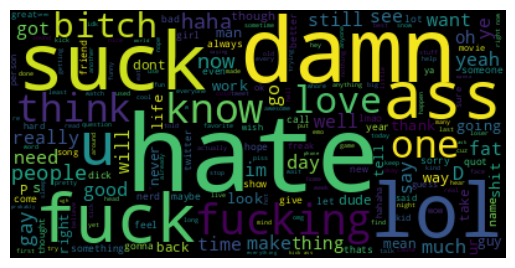

In [17]:
from wordcloud import WordCloud

import matplotlib.pyplot as plt

wordcloud=WordCloud().generate(" ".join(df['content']))

plt.imshow(wordcloud,interpolation='bilinear')

plt.axis('off')

plt.show()

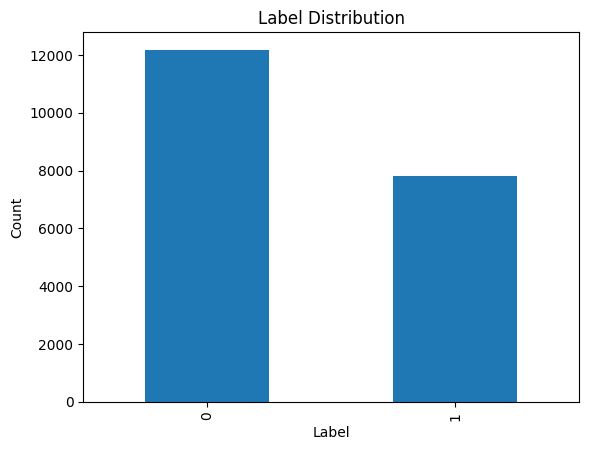

In [18]:
label_counts = df['label'].value_counts()

label_counts.plot(kind='bar')




plt.xlabel('Label')

plt.ylabel('Count')

plt.title('Label Distribution')




# Display the plot

plt.show()

In [19]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(df['content'],df['label'],test_size=0.2,random_state=42)

In [21]:
import nltk
nltk.download(['punkt','wordnet'])

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [23]:
from nltk.stem import WordNetLemmatizer

In [37]:
from nltk.corpus.reader.wordnet import WordNetCorpusReader
from nltk.corpus.reader import wordnet
def tokenize_lemma(text):#user defined/ custom tokenizer - with lemma power - ADD POS afterwards
  tokens=nltk.word_tokenize(text)

  lemm=nltk.WordNetLemmatizer()

  clean_tokens=[]
  for tok in tokens:
     tag=nltk.pos_tag([tok])[0][1][0]
     tag_dict={
      "J":wordnet.ADJ,
      "R":wordnet.ADV,
      "N":wordnet.NOUN,
      "V":wordnet.VERB
     }
     print(tag)
     tag_dict=tag_dict.get(tag,wordnet.NOUN)
     print(lemm.lemmatize(tok,tag_dict))
     clean_tokens.append(lemm.lemmatize(tok,tag_dict))
  return clean_tokens


In [27]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [38]:
tokenize_lemma("caring")

V
care


['care']

In [ ]:
#Areed's code

# from nltk.corpus.reader import wordnet

# def get_wordnet_pos_tag(word):

#   tag=nltk.pos_tag([word])[0][1][0]

#   tag_dict={

#       "J":wordnet.ADJ,

#       "R":wordnet.ADV,

#       "N":wordnet.NOUN,

#       "V":wordnet.VERB

#   }

#   return tag_dict.get(tag,wordnet.NOUN) #default tag - POS tag - when the word not classified as any predefined POS




# def tokenize_lemma(text): #user defined / custom tokenizer - with lemma power - POS

#   tokens=nltk.word_tokenize(text)

#   lemm=WordNetLemmatizer()




#   clean_tokens=[]

#   for word in tokens:

#     lemm.lemmatize(word,get_wordnet_pos_tag(word))

#     clean_tokens.append( lemm.lemmatize(word,get_wordnet_pos_tag(word)))




#   return clean_tokens





# tokenize_lemma("My Gradma is very caring. The striped bats are hanging on their feet")





In [30]:
from sklearn.feature_extraction.text import CountVectorizer

vect=CountVectorizer(tokenizer=tokenize_lemma) #remove punctuations,lowercase,tokenization,freq matrix

#access the tokenizationa and introduce lemma in that - hardcode explicitly

#generates freuency table for tokens of all docs +power of lemmatization

In [31]:
X_train_count=vect.fit_transform(X_train)

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


**COunt Vectorizer+TFIDFTransformer = TFIDFVectorizer**

In [39]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf=TfidfTransformer()#Highlights the important words in every documnet

In [40]:
#train our model - preprocessing text into vectors
X_train_count= vect.fit_transform(X_train)
X_train_tfidf=tfidf.fit_transform(X_train_count)

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [42]:
# train the model
from sklearn.tree import DecisionTreeClassifier
clf=DecisionTreeClassifier()
clf.fit(X_train_tfidf,y_train)

DecisionTreeClassifier()

**Use SVM instead**

In [44]:
#tests the model
X_test_tfidf=tfidf.transform(vect.transform(X_test))
y_pred=clf.predict(X_test_tfidf)

In [45]:
#accuracy
clf.score(tfidf.transform(vect.transform(df['content'])),df['label'])

0.9735013249337533

In [56]:
from sklearn.metrics import accuracy_score, classification_report

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(f"Classification Report:\n{report}")

Accuracy: 0.8755311172206949
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.82      0.89      2424
           1       0.78      0.96      0.86      1577

    accuracy                           0.88      4001
   macro avg       0.87      0.89      0.87      4001
weighted avg       0.89      0.88      0.88      4001



In [ ]:
!pip install gradio


In [66]:
#Grad IO
import gradio as gr




# Load your trained model and vectorizer

# ...




# Define the function to make predictions

def predict_comment(comment):

    transformed_comment = vect.transform([comment])

    prediction = clf.predict(tfidf.transform(transformed_comment)[0])
    print(prediction)

    return "Bullying Comment" if int(prediction[0]) == 1 else "Non-Bullying Comment"




# Create the Gradio interface

iface = gr.Interface(

    fn=predict_comment,

    inputs=gr.inputs.Textbox(placeholder="Enter a comment"),

    outputs="text"

)




# Launch the interface

iface.launch(debug=True)

/usr/local/lib/python3.10/dist-packages/gradio/inputs.py:27: UserWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/gradio/inputs.py:30: UserWarning: `optional` parameter is deprecated, and it has no effect
  super().__init__(
/usr/local/lib/python3.10/dist-packages/gradio/inputs.py:30: UserWarning: `numeric` parameter is deprecated, and it has no effect
  super().__init__(


Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Note: opening Chrome Inspector may crash demo inside Colab notebooks.

To create a public link, set `share=True` in `launch()`.


<IPython.core.display.Javascript object>

['1']
Keyboard interruption in main thread... closing server.
